# Data Bootcamp "Group Project"
## Analysis of historical stock return and volatility by industries using Fama-French Data

Sung Kim / Arthur Hong / Kevin Park

**Contents:**
1. Background
2. About the Data
3. Key Data
    + 3.1 | Slicing the Key Data
    + 3.2 | Joining the Key Data
4. Beta Calculation
5. Creating Visual Output

In [74]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version 
import numpy as np

# IPython command, puts plots in notebook 
%matplotlib inline

print('Today is', dt.date.today())
print('Python version:\n', sys.version, sep='')

Today is 2017-04-25
Python version:
3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


## 1 | Background

Designed by Eugene Fama and Kenneth French, Fama-French factor model is a widely used tool in finance created by employing statistical techniques to estimate returns of stocks. Within this project, we attempted to analyze stock returns and risks by calculating betas of different industries over the past seven year period.

Source: [Fama-French Website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

## 2 | About the Data

We collected our data by using PANDAS DataReader to get a direct feed to Kenneth French's data, where numerous equity market data are available online. Among them, we used the "30 Industry Portfolio" dataset to compare stock returns and risks of different industries. 

**Links to  data:**
+ [30 Industry Portfolio](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/30_Industry_Portfolios_CSV.zip)
+ [Documentation to get direct feed from DataReader](http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-ff)

## 3 | Key Data

We first imported the 30 industry portfolio data set. There are different categories: value or equal weighted, monthly or annual, etc. Detailed breakdown and description are shown below. 

### 3.1 | Slicing the Key Data
Among many different types of data, we will extract **value-weighted monthly return** (dataframe: 0 in 30 Industry Portfolios) since 2010 to run our analysis and store it in a dataframe **ind**. 

We also imported **Fama-French 3-factor data** with the same time frame, which contain:

+ **Mkt-RF** (market return - risk free rate)
+ **SMB** (Small-Minus-Big, the average return on the three small portfolios minus the average return on the three big portfolios)
+ **HML** (High-Minus-Low,  the average return on the two value portfolios minus the average return on the two growth portfolios)

Because we need market return rather than equity risk premium we add "Mkt" column in the dataframe by combining "Mkt-RF" and "RF". Finally, we set this 3-factor market data (Mkt-RF, SMB, HML, RF, and Mkt) in dataframe **mkt1**.

In [75]:
# importing 30 industry portfolio data set
import pandas_datareader.data as web

ff=web.DataReader("30_Industry_Portfolios", "famafrench")

In [76]:
print(ff['DESCR'])

30 Industry Portfolios
----------------------

This file was created by CMPT_IND_RETS using the 201702 CRSP database. It contains value- and equal-weighted returns for 30 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2017 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (86 rows x 30 cols)
  1 : Average Equal Weighted Returns -- Monthly (86 rows x 30 cols)
  2 : Average Value Weighted Returns -- Annual (7 rows x 30 cols)
  3 : Average Equal Weighted Returns -- Annual (7 rows x 30 cols)
  4 : Number of Firms in Portfolios (86 rows x 30 cols)
  5 : Average Firm Size (86 rows x 30 cols)
  6 : Sum of BE / Sum of ME (7 rows x 30 cols)
  7 : Value-Weighted Average of BE/ME (7 rows x 30 cols)


In [77]:
# extracting value-weighted return only
ff[0]

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2010-01,-0.92,-3.70,-3.15,1.12,1.23,0.85,-3.11,0.00,-4.04,-8.66,...,-6.70,-7.09,-7.88,-5.50,-4.04,-2.55,-1.92,-0.99,-1.18,2.24
2010-02,2.92,0.25,5.00,6.02,-1.78,3.69,6.07,0.37,5.46,15.68,...,2.85,2.85,6.30,3.04,7.25,5.89,4.32,4.56,2.70,1.87
2010-03,4.44,6.11,6.36,12.06,5.53,2.13,11.39,3.61,7.34,8.42,...,7.60,5.20,8.12,5.86,8.11,5.99,6.14,8.40,8.14,9.07
2010-04,-1.46,-1.76,-3.03,10.96,2.32,1.21,4.23,-2.23,3.08,11.43,...,3.59,0.47,3.89,4.22,3.82,3.20,1.85,7.36,0.95,3.86
2010-05,-5.37,-3.88,-7.71,-7.05,-10.12,-4.35,-5.67,-8.01,-9.99,-9.87,...,-5.81,-8.29,-7.08,-8.89,-5.98,-4.01,-5.83,-4.88,-9.12,-10.05
2010-06,-1.97,-1.63,3.54,-8.80,-8.70,-3.24,-9.31,-1.63,-7.79,-14.55,...,-3.98,-6.74,-5.99,-2.29,-7.66,-5.20,-10.56,-5.29,-7.31,-7.58
2010-07,5.04,8.37,11.12,7.85,5.29,4.22,8.34,2.15,14.24,6.81,...,9.58,8.22,6.82,7.64,10.84,3.20,4.65,7.04,6.62,8.03
2010-08,-0.46,-0.01,-0.05,-1.32,-10.04,-3.96,-7.41,-1.66,-0.11,-5.50,...,-2.13,-5.18,-8.21,-6.06,-4.65,-7.55,-4.18,0.38,-8.38,-7.12
2010-09,1.57,4.95,10.04,14.16,12.91,3.98,17.54,9.00,9.96,13.39,...,7.97,11.60,13.48,9.16,9.87,9.90,13.59,7.13,7.46,10.01


In [78]:
ind=ff[0]

In [79]:
ind.shape

(86, 30)

In [80]:
# importing mkt data from 3 factors model

mkt=web.DataReader("F-F_Research_Data_Factors", "famafrench")

In [81]:
mkt

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 2010-01   -3.36  0.37  0.30  0.00
 2010-02    3.40  1.19  3.18  0.00
 2010-03    6.31  1.49  2.15  0.01
 2010-04    2.00  4.99  2.83  0.01
 2010-05   -7.89  0.00 -2.41  0.01
 2010-06   -5.56 -2.01 -4.52  0.01
 2010-07    6.93  0.21 -0.21  0.01
 2010-08   -4.77 -2.99 -1.96  0.01
 2010-09    9.54  3.92 -3.12  0.01
 2010-10    3.88  1.14 -2.52  0.01
 2010-11    0.60  3.68 -0.91  0.01
 2010-12    6.82  0.68  3.78  0.01
 2011-01    1.99 -2.48  0.82  0.01
 2011-02    3.49  1.53  1.10  0.01
 2011-03    0.45  2.58 -1.57  0.01
 2011-04    2.90 -0.31 -2.53  0.00
 2011-05   -1.27 -0.72 -2.09  0.00
 2011-06   -1.75 -0.20 -0.33  0.00
 2011-07   -2.36 -1.34 -1.16  0.00
 2011-08   -5.99 -3.03 -2.40  0.01
 2011-09   -7.59 -3.54 -1.37  0.00
 2011-10   11.35  3.44 -0.22  0.00
 2011-11   -0.28 -0.18 -0.42  0.00
 2011-12    0.74 -0.67  1.71  0.00
 2012-01    5.05  2.15 -1.11  0.00
 2012-02    4.42 -1.72  0.11  0.00
 2012-03    3.11 

In [82]:
print(mkt['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 201702 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2017 Kenneth R. French

  0 : (86 rows x 4 cols)
  1 : Annual Factors: January-December (7 rows x 4 cols)


In [83]:
# Dropping annual result
mkt1=mkt[0]

In [84]:
mkt1

,Mkt-RF,SMB,HML,RF
Date,,,,
2010-01,-3.36,0.37,0.30,0.00
2010-02,3.40,1.19,3.18,0.00
2010-03,6.31,1.49,2.15,0.01
2010-04,2.00,4.99,2.83,0.01
2010-05,-7.89,0.00,-2.41,0.01
2010-06,-5.56,-2.01,-4.52,0.01
2010-07,6.93,0.21,-0.21,0.01
2010-08,-4.77,-2.99,-1.96,0.01
2010-09,9.54,3.92,-3.12,0.01


In [85]:
mkt1['Mkt']=mkt1['Mkt-RF']+mkt1['RF']

### 3.2 | Joining the Key Data

Now we add market return column (**"Mkt"** in dataframe **mkt1**) to ind dataframe.

Then key statistics, including means and standard deviations, are calculated to further derive betas of different industries. Since such statistics will be used in our beta calculation, we store it to a new dataframe **ind_stat**.

In [86]:
# Adding mkt data to 30 industry data set
ind['Mkt']=mkt1['Mkt']

In [87]:
ind.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other,Mkt
Date,,,,,,,,,,,,,,,,,,,,,
2016-10,-0.22,-1.63,4.55,5.53,-10.29,-2.98,-5.74,-7.43,-1.93,-4.15,...,-0.48,-2.21,-5.47,-0.62,-8.15,-3.57,-1.90,1.37,-0.50,-2.00
2016-11,-4.45,-5.75,-5.06,3.88,8.72,-3.78,1.81,1.37,7.57,1.59,...,0.08,2.36,4.22,12.76,9.27,3.00,8.46,12.02,8.26,4.87
2016-12,4.42,3.03,5.44,-3.23,1.26,1.57,-0.41,0.86,0.35,-1.24,...,-0.11,2.09,1.89,0.87,2.37,-0.95,0.64,3.77,2.58,1.84
2017-01,0.77,-0.98,5.58,4.94,2.23,2.61,0.03,2.21,3.83,6.95,...,5.55,3.26,2.32,1.74,1.71,0.97,0.79,0.64,-0.81,1.98
2017-02,1.77,6.17,7.94,0.66,1.10,5.01,3.85,7.07,3.14,-2.08,...,3.22,7.03,3.25,2.60,2.78,2.83,2.44,4.68,3.75,3.61


In [88]:
# calculating historical average return and standard deviation
ind_stat=ind.describe()
ind_stat

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other,Mkt
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1.055814,1.234419,1.769419,1.694419,0.839186,0.887791,1.316047,1.248023,1.289767,1.775465,...,1.211860,1.218953,1.195465,1.377674,1.187326,1.249884,1.415116,1.204070,1.259186,1.135233
std,3.049519,3.093921,4.730284,6.326911,5.499421,3.144038,5.245716,3.840663,5.718435,6.089188,...,4.364645,4.963212,4.258059,4.652760,4.128541,3.806922,3.447848,4.954903,4.205391,3.770003
min,-5.830000,-5.750000,-8.820000,-19.220000,-10.290000,-6.940000,-10.760000,-9.420000,-16.450000,-14.550000,...,-8.290000,-8.240000,-10.210000,-9.340000,-8.670000,-10.560000,-6.480000,-11.020000,-10.050000,-7.880000
25%,-0.870000,-0.895000,-2.735000,-1.992500,-2.430000,-1.067500,-1.777500,-0.845000,-1.807500,-2.537500,...,-1.680000,-1.907500,-1.505000,-1.480000,-1.297500,-0.942500,-0.742500,-1.855000,-1.382500,-1.252500
50%,1.095000,1.040000,2.775000,1.770000,0.855000,0.975000,1.205000,1.440000,1.225000,2.050000,...,1.045000,1.545000,1.900000,1.245000,1.645000,0.985000,1.460000,1.970000,1.290000,1.325000
75%,3.657500,3.470000,5.207500,5.717500,5.250000,3.217500,4.132500,3.647500,4.370000,5.625000,...,3.567500,4.712500,3.525000,3.985000,3.612500,3.780000,3.757500,4.075000,3.645000,3.582500
max,6.560000,8.370000,11.120000,15.330000,12.910000,8.690000,17.540000,9.000000,18.210000,15.680000,...,12.100000,13.480000,10.830000,15.280000,13.760000,13.590000,10.140000,13.430000,11.820000,11.350000


## 4 | Beta Calculation

In order to facilitate matrix calculation, we altered the form of **ind_stat** to a inverse matrix and stored it as **ind_stat_inv**.
By definition, industry betas are calculated as:

**Beta = (covariance between market and an industry) / (variance of market)**

Once we found industry betas, we created a new column "Beta" to our **ind_stat_inv** and sorted by beta in ascending order.

In [89]:
# inverse matrix
ind_stat_inv = pd.DataFrame(np.linalg.pinv(ind_stat.values), ind_stat.columns, ind_stat.index)
ind_stat_inv

,count,mean,std,min,25%,50%,75%,max
Food,0.003066,-0.190092,-0.099425,-0.005297,0.031880,-0.003946,0.119478,-0.001557
Beer,0.003109,0.080256,-0.036212,0.003230,-0.041608,-0.110700,0.002342,-0.003899
Smoke,-0.002745,-0.005173,-0.098081,0.010678,-0.170987,0.220630,0.062432,-0.000807
Games,-0.005237,0.082219,0.044579,-0.042517,0.142660,0.005999,0.073072,-0.025430
Books,-0.002754,-0.170448,0.077162,0.035191,0.106827,-0.053044,0.192201,-0.004133
Hshld,0.005481,-0.212505,-0.176291,-0.016944,-0.011582,0.024886,0.063523,0.011324
Clths,-0.001131,0.228893,0.156873,0.027005,-0.001781,-0.119093,-0.104524,-0.000033
Hlth,0.001536,-0.038620,0.044805,-0.015552,0.070336,0.017098,-0.021332,-0.017453
Chems,-0.000172,0.067451,-0.011609,-0.030063,0.066029,-0.030811,-0.041460,0.002283
Txtls,-0.005650,0.252605,0.121610,0.006250,-0.013366,-0.010123,-0.007140,-0.020291


In [90]:
# beta calculation

def calc_beta(n):
    np_array = ind.values
    m = np_array[:,30] # market returns are column zero from numpy array
    s = np_array[:,n] # stock returns are column one from numpy array
    covariance = np.cov(s,m) # Calculate covariance between stock and market
    beta = covariance[0,1]/covariance[1,1]
    beta = covariance[0,1]/covariance[1,1]
    return beta

In [91]:
numlist=range(0,31,1)

In [92]:
beta=[calc_beta(i) for i in numlist]
beta

[0.55916894058164057,
 0.4480120547381532,
 0.64000860244778091,
 1.2878834409809214,
 1.2430406211982077,
 0.58872829284028005,
 0.90026180666886013,
 0.79738353567566511,
 1.3619602564590942,
 1.2724172598468011,
 1.4206888986567519,
 1.637188084232104,
 1.4705301931278507,
 1.3209627971699354,
 1.5107128268891814,
 1.0552670733586162,
 1.2765590519568235,
 1.7408191863495055,
 1.1652674233319913,
 0.39375745557657971,
 0.86927877184406743,
 1.0516962111098531,
 1.1635736805926991,
 1.0511587366666271,
 1.0311431557530157,
 0.9858406071869521,
 0.85022960774196532,
 0.70446322524846272,
 1.197254954219817,
 0.9396045303169368,
 1.0]

In [93]:
# Adding beta result
ind_stat_inv['Beta']=beta
ind_stat_inv

,count,mean,std,min,25%,50%,75%,max,Beta
Food,0.003066,-0.190092,-0.099425,-0.005297,0.031880,-0.003946,0.119478,-0.001557,0.559169
Beer,0.003109,0.080256,-0.036212,0.003230,-0.041608,-0.110700,0.002342,-0.003899,0.448012
Smoke,-0.002745,-0.005173,-0.098081,0.010678,-0.170987,0.220630,0.062432,-0.000807,0.640009
Games,-0.005237,0.082219,0.044579,-0.042517,0.142660,0.005999,0.073072,-0.025430,1.287883
Books,-0.002754,-0.170448,0.077162,0.035191,0.106827,-0.053044,0.192201,-0.004133,1.243041
Hshld,0.005481,-0.212505,-0.176291,-0.016944,-0.011582,0.024886,0.063523,0.011324,0.588728
Clths,-0.001131,0.228893,0.156873,0.027005,-0.001781,-0.119093,-0.104524,-0.000033,0.900262
Hlth,0.001536,-0.038620,0.044805,-0.015552,0.070336,0.017098,-0.021332,-0.017453,0.797384
Chems,-0.000172,0.067451,-0.011609,-0.030063,0.066029,-0.030811,-0.041460,0.002283,1.361960
Txtls,-0.005650,0.252605,0.121610,0.006250,-0.013366,-0.010123,-0.007140,-0.020291,1.272417


In [94]:
sort=ind_stat_inv = ind_stat_inv.sort_values(by='Beta', ascending=False)
sort

,count,mean,std,min,25%,50%,75%,max,Beta
Coal,-0.000125,-0.348547,0.081083,-0.001417,0.084385,0.104198,0.040830,-0.009765,1.740819
Steel,0.002742,0.523826,0.139463,-0.001725,-0.195451,-0.143862,-0.332858,-0.020853,1.637188
Autos,-0.004788,0.039412,0.132046,0.041265,0.097295,-0.107643,0.055696,0.022107,1.510713
FabPr,-0.000294,-0.099268,-0.274283,-0.018338,-0.091124,0.094021,0.088957,0.045213,1.470530
Cnstr,-0.000163,-0.330409,-0.268161,-0.028424,0.029554,0.183561,0.135689,0.047331,1.420689
Chems,-0.000172,0.067451,-0.011609,-0.030063,0.066029,-0.030811,-0.041460,0.002283,1.361960
ElcEq,-0.000350,-0.021089,0.163399,0.010160,0.103311,0.010595,-0.087745,-0.002930,1.320963
Games,-0.005237,0.082219,0.044579,-0.042517,0.142660,0.005999,0.073072,-0.025430,1.287883
Mines,0.001059,0.232688,-0.232239,-0.021242,-0.173084,-0.226871,0.109134,0.004537,1.276559
Txtls,-0.005650,0.252605,0.121610,0.006250,-0.013366,-0.010123,-0.007140,-0.020291,1.272417


## 5 | Creating Visual Output

We created four visual presentations to help better understand how different betas can be shown in a given timeframe. 


In [95]:
#Transpose industry returns table to make heatmap
ind_heatmap = ind.T
ind_heatmap.tail()

Date,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
Rtail,-1.92,4.32,6.14,1.85,-5.83,-10.56,4.65,-4.18,13.59,1.32,...,1.20,0.73,3.80,-1.67,-0.16,-3.57,3.00,-0.95,0.97,2.83
Meals,-0.99,4.56,8.40,7.36,-4.88,-5.29,7.04,0.38,7.13,6.06,...,-1.47,1.18,2.20,-0.22,-2.26,-1.90,8.46,0.64,0.79,2.44
Fin,-1.18,2.70,8.14,0.95,-9.12,-7.31,6.62,-8.38,7.46,1.97,...,2.17,-4.86,3.91,4.65,-1.34,1.37,12.02,3.77,0.64,4.68
Other,2.24,1.87,9.07,3.86,-10.05,-7.58,8.03,-7.12,10.01,-0.11,...,-2.01,3.63,-0.23,2.24,-3.52,-0.50,8.26,2.58,-0.81,3.75
Mkt,-3.36,3.40,6.32,2.01,-7.88,-5.55,6.94,-4.76,9.55,3.89,...,1.79,-0.03,3.97,0.52,0.27,-2.00,4.87,1.84,1.98,3.61


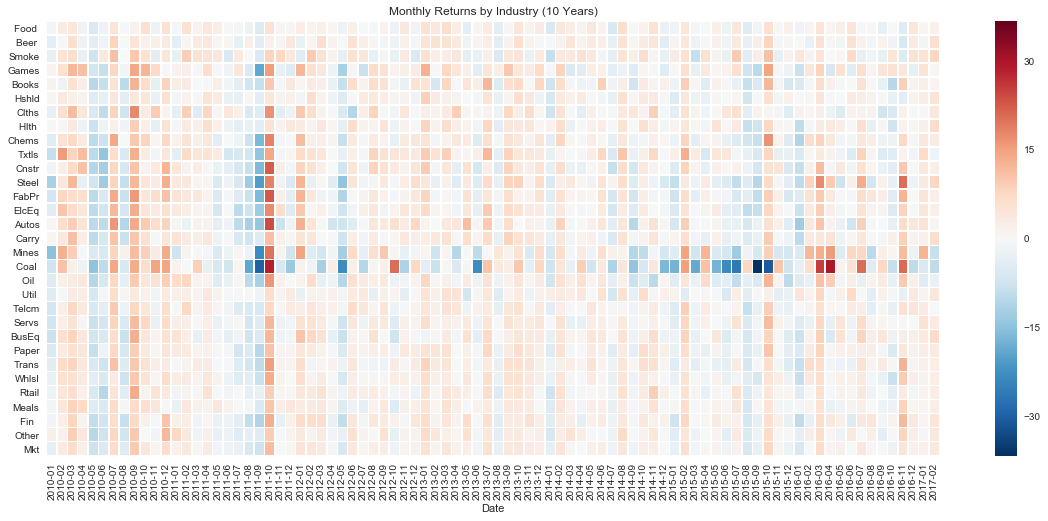

In [96]:
#heatmap of monthly returns since 2010 
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(20,8)) 
sns.heatmap(ind_heatmap, annot=False, linewidths=.5)
ax.set_title("Monthly Returns by Industry (10 Years)")

#### On the heatmap of monthly returns by industry, we can see which industries have more extreme swings, and which have less variation. 'Coal' looks to be particularly volatile. 'Food' and 'Utilities' looks more stable. 

In [97]:
#Sort a beta-only table to create beta bar chart 
beta_table = sort[['Beta']]
beta_table.head()

,Beta
Coal,1.740819
Steel,1.637188
Autos,1.510713
FabPr,1.470530
Cnstr,1.420689


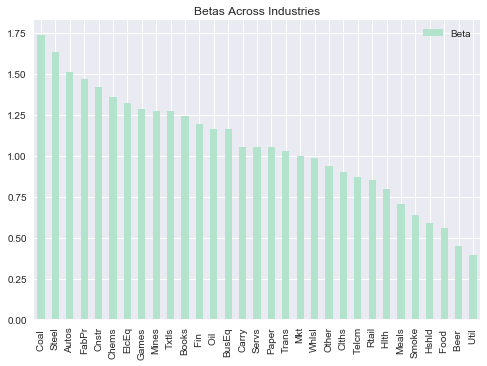

In [98]:
#Bar chart of betas sorted from high to low
plt.style.use('seaborn-pastel')

ax = beta_table.plot(kind='bar', colormap = "Pastel2")
ax.set_title("Betas Across Industries")

#### Sure enough, 'Coal' had the highest beta value (beta > 1 means that returns are more volatile than market returns), and 'Utilities' had the lowest beta

In [99]:
#Creating a dataframe just to see the most extreme values from the beta bar chart
industry_set = ind[['Coal ','Util ','Mkt']]
industry_set = industry_set.rename(columns={'Coal ':'Coal','Util ':'Utilities','Mkt':'Market'})
industry_set.tail()

,Coal,Utilities,Market
Date,,,
2016-10,-8.67,-0.61,-2.00
2016-11,20.79,-2.84,4.87
2016-12,-9.65,3.64,1.84
2017-01,-5.32,1.09,1.98
2017-02,-9.39,4.02,3.61


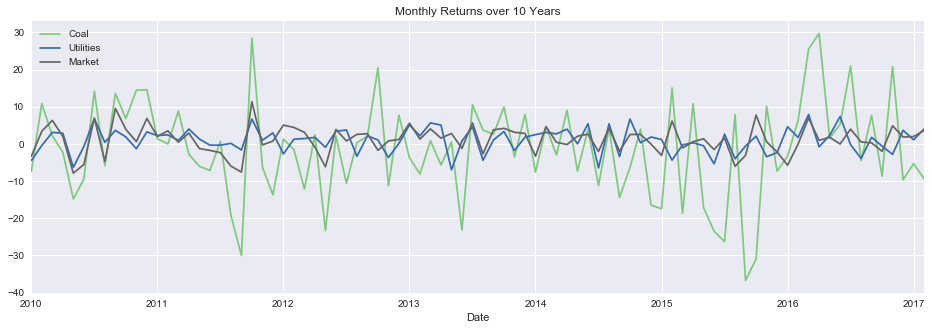

In [100]:
#Line plot of the returns of Coal, Utilities, and the general market
import seaborn as sns
plt.style.use('seaborn-pastel')

ax = industry_set.plot(linestyle='-', colormap = "Accent", figsize = (16,5))
ax.set_title("Monthly Returns over 10 Years")

#### By plotting 'Coal' and 'Utilities' returns against the market's returns, we can verify the amplitude each's returns... although the chart is a little hectic

In [101]:
#Calculating a new dataframe to look at excess returns
industry_diff = industry_set
industry_diff['Coal Excess Returns'] = industry_set['Coal'] - industry_set['Market']
industry_diff['Utilities Excess Returns'] = industry_set['Utilities'] - industry_set['Market']
industry_diff = industry_diff.drop(industry_diff.columns[[0,1,2]], 1)
industry_diff.tail()

,Coal Excess Returns,Utilities Excess Returns
Date,,
2016-10,-6.67,1.39
2016-11,15.92,-7.71
2016-12,-11.49,1.80
2017-01,-7.30,-0.89
2017-02,-13.00,0.41


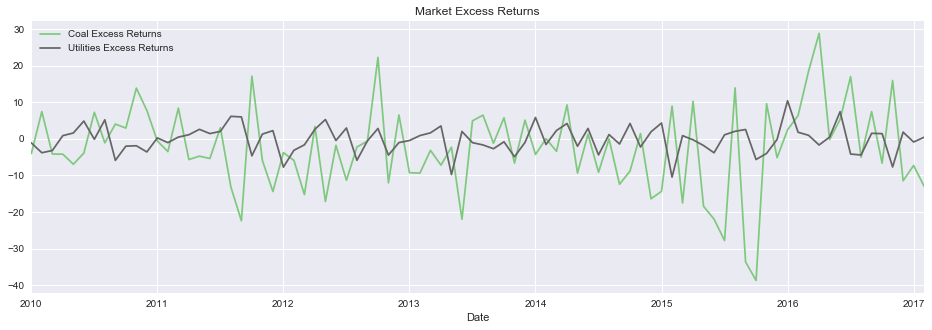

In [102]:
#Line plot of the excess returns
plt.style.use('seaborn-pastel')

ax = industry_diff.plot(linestyle='-', colormap = "Accent", figsize = (16,5))
ax.set_title("Market Excess Returns")

#### By comparing the excess returns (positive or negative) of each against the market, we get a clearer view of the stability of the Utilities industry's returns vs the volatility of the Coal industry's returns